# EDA E-Commerce Sales Transaction di United Kingdom pada tahun 2019

### Import Library yang dibutuhkan

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Mengimport data dari csv

In [210]:
df = pd.read_csv("Sales Transaction v.4a.csv", delimiter = ",")

### Membersihkan Data

#### Mengecek Null Value pada Data dan Membuangnya

In [211]:
# Mengecek Null Value di Data
df.isna().sum() 

# Menghapus Null Value
dfsales = df.dropna(how="any", axis=0)

#### Melihat apakah Null Value sudah terhapus

In [212]:
dfsales.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

#### Memahami Data 

In [213]:
# Mengambil data yang dengan country United Kingdom
dfsales = dfsales.loc[dfsales["Country"] == "United Kingdom"]

# Info Tentang Data
dfsales.info()
dfsales.columns
dfsales.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 485040 entries, 0 to 536335
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  485040 non-null  object 
 1   Date           485040 non-null  object 
 2   ProductNo      485040 non-null  object 
 3   ProductName    485040 non-null  object 
 4   Price          485040 non-null  float64
 5   Quantity       485040 non-null  int64  
 6   CustomerNo     485040 non-null  float64
 7   Country        485040 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.3+ MB


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


#### Merubah Format Date agar mudah proses pengolahan

In [214]:
dateFormat = "%m/%d/%Y"
dfsales["Date"] = pd.to_datetime(dfsales["Date"], format = dateFormat)

### Deskripsi Data

The data set contains 500K rows and 8 columns. The following is the description of each column.

1. TransactionNo (categorical): a six-digit unique number that defines each transaction.
2. Date (numeric): the date when each transaction was generated.
3. ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
4. Product (categorical): product/item name.
5. Price (numeric): the price of each product per unit in pound sterling (£).
6. Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
7. CustomerNo (categorical): a five-digit unique number that defines each customer.
8. Country (categorical): name of the country where the customer resides.
There is a small percentage of order cancellation in the data set. These cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.

link data : https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

### Analisis Data

#### Memahami data, menambahkan kolom Month, Year dan Total Money.

In [215]:
dfsales["Month"] = pd.DatetimeIndex(dfsales["Date"]).month
dfsales["Year"] = pd.DatetimeIndex(dfsales["Date"]).year
dfsales["TotalMoney"] = dfsales["Price"]*dfsales["Quantity"]
dfsales.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Month,Year,TotalMoney
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,12,2019,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,12,2019,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,12,2019,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,12,2019,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,12,2019,71.64


#### Trend Penjualan 

##### Mencari Income paling besar tiap bulannya

In [216]:
# Grouping Data to get sum, memilih tahun 2019 saja
trend = dfsales.loc[dfsales["Year"] == 2019]
trend = trend.groupby("Month").agg({
    "TotalMoney":"sum"
}).reset_index()
trend

# Making list for looping
listMonth = range(1,13)
listMaxMoney = []


# Looping to get max total money each month
for i in listMonth:
    MaxMoney = trend["TotalMoney"].loc[trend["Month"] == i].max()

    listMaxMoney.append(MaxMoney) # Dalam juta pound sterling

dictTrend = {
    "Month": listMonth,
    
    "Total Money": listMaxMoney
}

dfTrend = pd.DataFrame(dictTrend)
dfTrend


,Month,Total Money
0,1,2767384.69
1,2,2704391.22
2,3,3537879.14
3,4,3053781.87
4,5,3689628.88
5,6,3502502.18
6,7,3771542.14
7,8,3671892.15
8,9,5480491.58
9,10,5632442.40


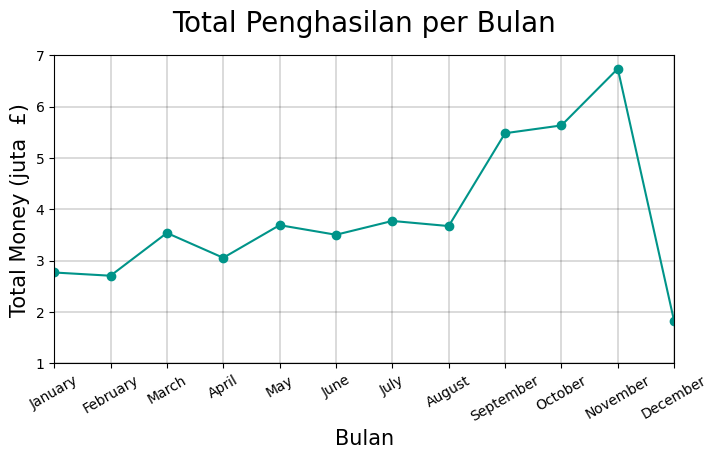

In [217]:
fig = plt.subplots(figsize=(8, 4))

plt.plot(dfTrend["Month"], dfTrend["Total Money"]/1000000, 
color = "#009489", marker = "o", linestyle = "-", linewidth = 1.5)
plt.title("Total Penghasilan per Bulan", pad = 17, fontsize = 20, color = "k")

plt.xlabel("Bulan", fontsize = 15)
plt.ylabel("Total Money (juta  £)", fontsize = 15)

plt.grid(color = "black", linestyle ="-", linewidth = 0.2) 
plt.xlim(1,12)
plt.ylim(1,7)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["January", "February", "March",
"April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation = 30)
  
plt.show()

##### Mencari Quantity yang paling Banyak setiap bulannya terjual

In [218]:
# Quantity Over Months
trend = dfsales.loc[dfsales["Year"] == 2019]
trend = trend.groupby(["Month", "ProductName"]).agg({
    "Quantity":"sum"
}).reset_index()
trend

# Making list for looping
listMonth = range(1,13)
listMaxQuantity = []


# Looping to get max quantity each month
for i in listMonth:
    MaxQuantity = trend["Quantity"].loc[trend["Month"] == i].max()

    listMaxQuantity.append(MaxQuantity)

dictTrend = {
    "Month": listMonth,
    
    "Max Quantity": listMaxQuantity
}

dfTrendQuantity = pd.DataFrame(dictTrend)
dfTrendQuantity



,Month,Max Quantity
0,1,5227
1,2,3976
2,3,5076
3,4,9471
4,5,6722
5,6,3149
6,7,5019
7,8,6496
8,9,3919
9,10,8084


##### Mencari Produk nya

In [219]:
trend = dfsales.loc[dfsales["Year"] == 2019]
trend = trend.groupby(["Month", "ProductName"]).agg({
    "Quantity":"sum"
}).reset_index()


dfMaxProduct = []

# Mengambil ProductName setiap bulannya
for i in range(len(listMonth)):

    MaxProduct = trend.loc[(trend["Month"] == listMonth[i]) & (trend["Quantity"] == listMaxQuantity[i])]

    dfMaxProduct.append(MaxProduct)
    
dfMaxProduct

# Menjadikannya data frame agar mudah dipahami
for i in range(len(dfMaxProduct)):
    if i == 0:
        Max = dfMaxProduct[i]
    else:
        Max = Max.append(dfMaxProduct[i])

dfMax = pd.DataFrame(Max)
dfMax



C:\Users\madii\AppData\Local\Temp\ipykernel_15472\342900854.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Max = Max.append(dfMaxProduct[i])
C:\Users\madii\AppData\Local\Temp\ipykernel_15472\342900854.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Max = Max.append(dfMaxProduct[i])
C:\Users\madii\AppData\Local\Temp\ipykernel_15472\342900854.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Max = Max.append(dfMaxProduct[i])
C:\Users\madii\AppData\Local\Temp\ipykernel_15472\342900854.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Max = Max.append(dfMaxProduct[i])
C:\Users\madii\AppData\Local\Temp\ipykernel_15472\342900

,Month,ProductName,Quantity
577,1,Cream Hanging Heart T-Light Holder,5227
3153,2,Empire Design Rosette,3976
5901,3,Jumbo Bag Red Retrospot,5076
9552,4,World War 2 Gliders Asstd Designs,9471
11194,5,Popcorn Holder,6722
13108,6,Jumbo Bag Red Retrospot,3149
15441,7,Girls Alphabet Iron On Patches,5019
17249,8,Assorted Colour Bird Ornament,6496
20766,9,Jumbo Bag Red Retrospot,3919
24920,10,World War 2 Gliders Asstd Designs,8084


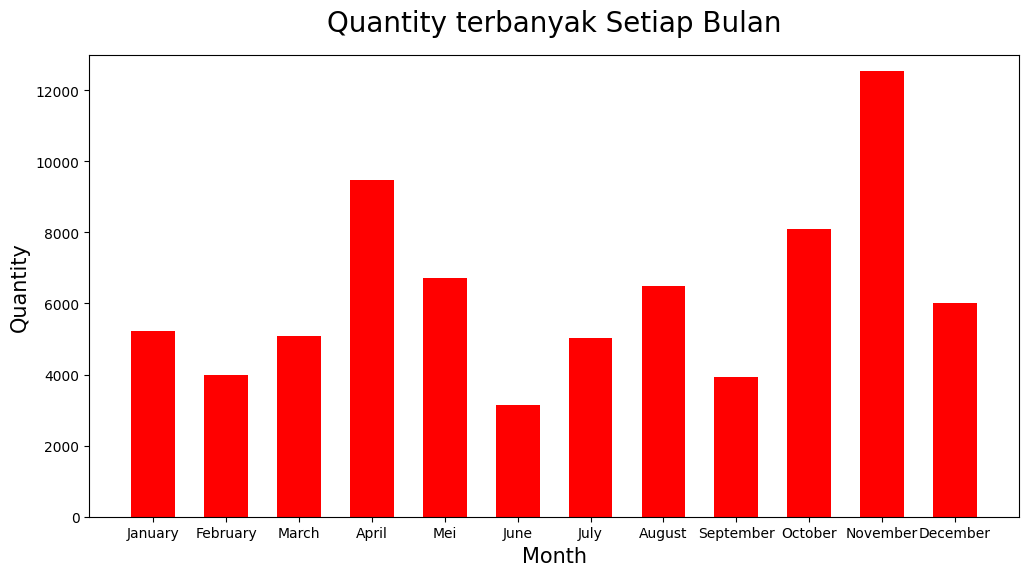

In [220]:
fig = plt.subplots(figsize=(12, 6))

plt.bar(data = dfMax, x = dfMax["Month"],height = dfMax["Quantity"], color = "red", width=.6)
plt.title("Quantity terbanyak Setiap Bulan", pad = 17, fontsize = 20, color = "k")

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["January", "February", "March",
"April", "Mei", "June", "July", "August", "September", "October", "November", "December"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Quantity", fontsize = 15)


plt.ylim(0,13000)
plt.show()

#### Dibeli terbanyak

##### 10 Produk yang paling banyak dibeli berdasarkan bulannya

In [221]:
trend = dfsales.loc[dfsales["Year"] == 2019]
trend = trend.groupby(["Month", "ProductName"]).agg({
    "Quantity":"sum"
}).reset_index()

trend.nlargest(10, "Quantity")

,Month,ProductName,Quantity
25168,11,Asstd Design 3d Paper Stickers,12551
26821,11,Popcorn Holder,11728
9552,4,World War 2 Gliders Asstd Designs,9471
26857,11,Rabbit Night Light,8335
24920,10,World War 2 Gliders Asstd Designs,8084
26637,11,Paper Chain Kit 50'S Christmas,7568
11194,5,Popcorn Holder,6722
17249,8,Assorted Colour Bird Ornament,6496
29395,12,Popcorn Holder,6002
26227,11,Jumbo Bag Red Retrospot,5463


##### Produk yang paling banyak dibeli selama tahun 2019

In [222]:
banyak_terjual = dfsales.loc[dfsales["Year"] == 2019]
banyak_terjual = banyak_terjual.groupby("ProductName").agg({"Quantity":"sum"}).reset_index()

banyak_terjual.nlargest(10, "Quantity")

,ProductName,Quantity
2433,Popcorn Holder,50399
3602,World War 2 Gliders Asstd Designs,43934
1642,Jumbo Bag Red Retrospot,41065
202,Assorted Colour Bird Ornament,31430
810,Cream Hanging Heart T-Light Holder,30059
2087,Pack Of 12 London Tissues,22501
3366,Victorian Glass Hanging T-Light,21931
2120,Pack Of 72 Retrospot Cake Cases,21756
513,Brocade Ring Purse,21721
210,Assorted Colours Silk Fan,20040


#### Berapa banyak Produk yang dibeli setiap transaksi

In [223]:
banyak_dibeli = dfsales.loc[dfsales["Year"] == 2019]
banyak_dibeli = banyak_dibeli.groupby(["Date", "TransactionNo"])["CustomerNo"].count().reset_index()

banyak_dibeli.describe()
n = 10
banyak_dibeli["CustomerNo"].value_counts()[:n]# berapa banyak produk yang dibeli disetiap transaksi


1     2696
2     1262
3      905
4      663
5      650
7      553
6      548
8      537
9      535
16     468
Name: CustomerNo, dtype: int64

###### setiap transaksi, customer paling banyak membeli 1 barang saja. 

#### Produk yang paling menguntungkan

In [224]:
menguntungkan = dfsales.loc[dfsales["Year"] == 2019]
menguntungkan = menguntungkan.groupby("ProductName")["TotalMoney"].sum().reset_index()
menguntungkan = menguntungkan.nlargest(10, "TotalMoney")

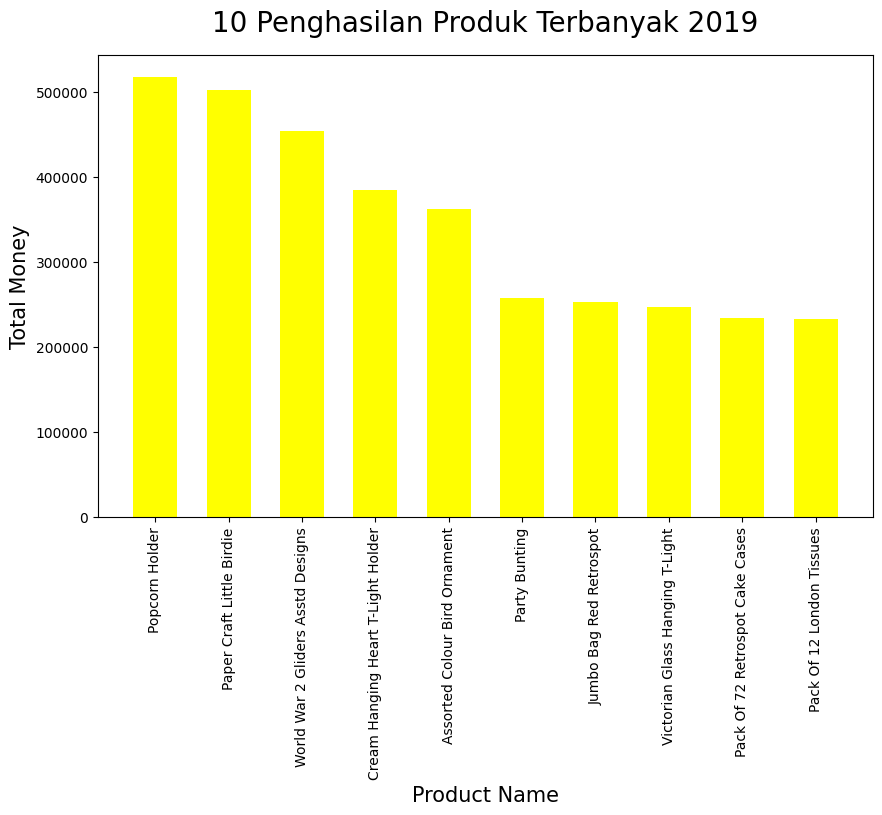

In [225]:
fig = plt.subplots(figsize=(10, 6))

plt.bar(data = menguntungkan, x = menguntungkan["ProductName"],
height = menguntungkan["TotalMoney"], color = "yellow", width=.6)

plt.title("10 Penghasilan Produk Terbanyak 2019", pad = 17, fontsize = 20, color = "k")


plt.xlabel("Product Name", fontsize = 15)
plt.ylabel("Total Money", fontsize = 15)

plt.xticks(rotation = 90)

plt.show()